<center><h1>Laboratorio 1 Modelamiento - Inteligencia Artificial</h1></center>

Nombres:

- Genesis Heredia
- Kevin Paute Sánchez

Fecha: 13/08/2022

# Importar librerías

In [37]:
# Se realiza la importación de la libreria os
import os
# Se realiza la importación de la libreriaOpenCV
import cv2
# Se realiza la importación de la librerianumpy
import numpy as np
# Se realiza la importación de Image de la libreria PIL
from PIL import Image
# Se realiza la importación de la libreriamatplotlib
import matplotlib.pyplot as plt
# Se realiza la importación de train_test_split de la libreria sklearn
from sklearn.model_selection import train_test_split
# Preparamos el ambiente
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# Se realiza la importación dekeras de la libreria tensorflow
from tensorflow import keras
# Importamos Sequential de la libreria keras
from keras.models import Sequential
# Importamos Conv2D,MaxPooling2D,Dense,Flatten,Dropout de la libreria keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
# Importamos BatchNormalization de la libreria tensorflow
from tensorflow.keras.layers import BatchNormalization
# Se realiza la importación de la libreria tensorflow
import tensorflow as tf
# Importamos la libreria visualkeras
import visualkeras

# Data loading and exploration

In [38]:
# Se define la ruta de las imagenes que fueron removidas el fondo
removeBG_img = 'dataset_imagenes_removedBG'
# Se inicializa la variable random_seed con nueve
random_seed = 9
# Obtenemos las categorias
categories = os.listdir(removeBG_img)
# Mostramos las categorias
print("Lista de categorias = ",categories,"\n\nNo. de categorias = ", len(categories))

Lista de categorias =  ['ArroboMercy', 'CevallosJoan', 'GenesisHeredia', 'PauteKevin', 'RivasSelena'] 

No. de categorias =  5


In [39]:
def load_images_and_labels(categories):
    '''
        Método que carga las imágenes y sus etiquetas de las categorías
        de la carpeta removeBG_img.
        Parámetros:
            categories: lista de categorías a cargar
        Retorna:
            images: lista de imágenes de las categorías
            labels: lista de etiquetas de las imágenes   
    '''
    # Se Instancia la lista de imagenes
    img_lst=[]
    # Se Instancia   la lista de etiquetas
    labels=[]
    # Bucle encargado de cargar las imágenes de las categorías
    for index, category in enumerate(categories):
        # Bucle que recorre la ruta de las imagenes
        for image_name in os.listdir(removeBG_img+"/"+category):
            # Leer las imagenes
            img = cv2.imread(removeBG_img+"/"+category+"/"+image_name)
            #  Convierte la imagen a RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            IMAGE_SIZE = (192,192)
            img = cv2.resize(img, IMAGE_SIZE)
            # Convierte la imagen a un array
            img_array = Image.fromarray(img, 'RGB')
            # Agrega la imagen al array de imágenes
            img_lst.append(np.array(img_array))
            # Agrega el indice a las etiquetas
            labels.append(index)
    #Retorna la lista de imagenes y etiquetas
    return img_lst, labels

# Cargamos las imagenes y las etiquetas
images, labels = load_images_and_labels(categories)
# Mostramos la cantidad de imagenes y etiquetas cargadas
print("No. de imagenes cargadas = ",len(images),"\nNo. de etiquetas cargadas = ",len(labels))
# Mostramos el tipo de arreglo creado
print(type(images),type(labels))

No. de imagenes cargadas =  150 
No. de etiquetas cargadas =  150
<class 'list'> <class 'list'>


In [40]:
# convierte la lista de imágenes a un array de numpy
images = np.array(images) 
# convierte la lista de etiquetas a un array de numpy
labels = np.array(labels) 
# muestra las dimensiones de las imágenes y las etiquetas
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape) 
# muestra el tipo de las imágenes y las etiquetas
print(type(images),type(labels)) 

Images shape =  (150, 192, 192, 3) 
Labels shape =  (150,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


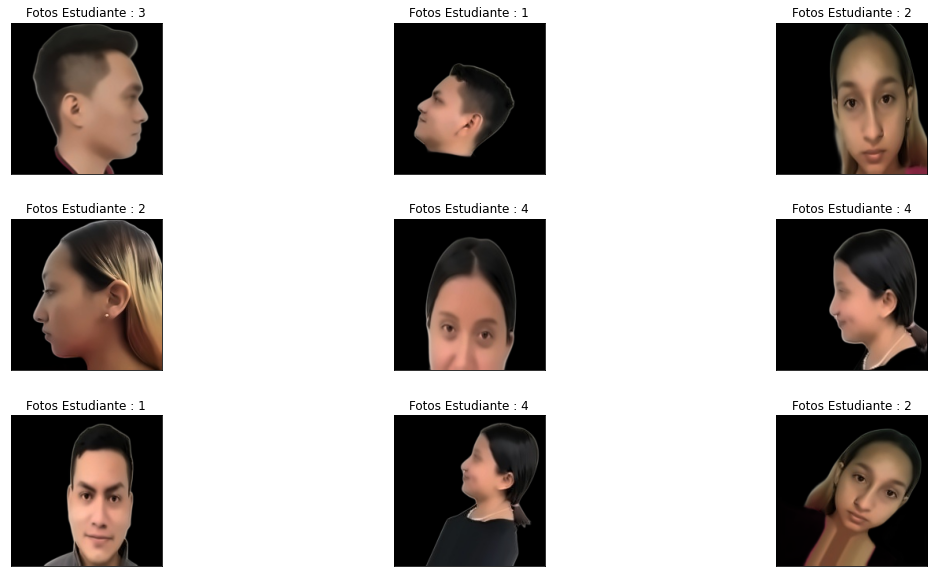

In [42]:
def display_rand_images(images, labels):
    '''
        Método que muestra una imagen aleatoria de cada categoría
        de la carpeta fpath.
        Parámetros:
            images: lista de imágenes de las categorías
            labels: lista de etiquetas de las imágenes   
    '''
    # crea una figura de 19x10
    plt.figure(1 , figsize = (19 , 10)) 
    # contador de imágenes
    n = 0 
    # recorre las categorías de las imágenes y las etiquetas 
    for i in range(9): 
        # incrementa el contador de imágenes
        n += 1 
        # obtiene un número aleatorio entre 0 y el tamaño de la lista de imágenes
        r = np.random.randint(0 , images.shape[0] , 1) 
        # crea una subgráfica de 3x3 con el número de la imagen
        plt.subplot(3 , 3 , n) 
        # ajusta el espaciado entre subgráficas
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3) 
        # muestra la imagen en la subgráfica
        plt.imshow(images[r[0]]) 
         # muestra el título de la imagen con la etiqueta
        plt.title('Fotos Estudiante : {}'.format(labels[r[0]]))
        # oculta los ejes x
        plt.xticks([]) 
         # oculta los ejes y
        plt.yticks([])
    # muestra la gráfica    
    plt.show() 
# muestra las imágenes aleatorias    
display_rand_images(images, labels) 

# Preparación de la data para entrenamiento del modelo CNN

In [43]:
# crea un array de números enteros de 0 a la cantidad de imágenes
n = np.arange(images.shape[0]) 
# muestra los valores del array de números enteros
print("'n' valores antes de shuffling = ",n) 
# establece el semilla para el random shuffle
np.random.seed(random_seed) 
 # random shuffle el array de números enteros
np.random.shuffle(n)
# muestra los valores del array
print("\n'n' valores después de shuffling = ",n) 

'n' valores antes de shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]

'n' valores después de shuffling =  [135  90 145 147  60  37  26   3  75   9  25  73  98  94  39  81  31  55
 101  47  28  27 111  20 118  89  43 144   8 137 112 138  23  67  79  82
  76  45 109   7  17 100  86  44 103  68   6  69  35 130  70  51  10  53
 133 136 110 140  80  21 134  38   2  84 116  11  57  78 122  96  97  36
  32 148  88  14 107  83 10

In [44]:
# Imagenes shuffleadas
images = images[n] 
# Etiquetas shuffleadas
labels = labels[n] 
# muestra las dimensiones de las imágenes y las etiquetas
print("Images shape después de shuffling = ",images.shape,"\nLabels shape después de shuffling = ",labels.shape) 

Images shape después de shuffling =  (150, 192, 192, 3) 
Labels shape después de shuffling =  (150,)


In [45]:
# convierte las imágenes a float32
images = images.astype(np.float32) 
# convierte las etiquetas a int32
labels = labels.astype(np.int32) 
# normaliza las imágenes
images = images/255 
# muestra las dimensiones de las imágenes
print("Images shape después de normalización = ",images.shape) 

Images shape después de normalización =  (150, 192, 192, 3)


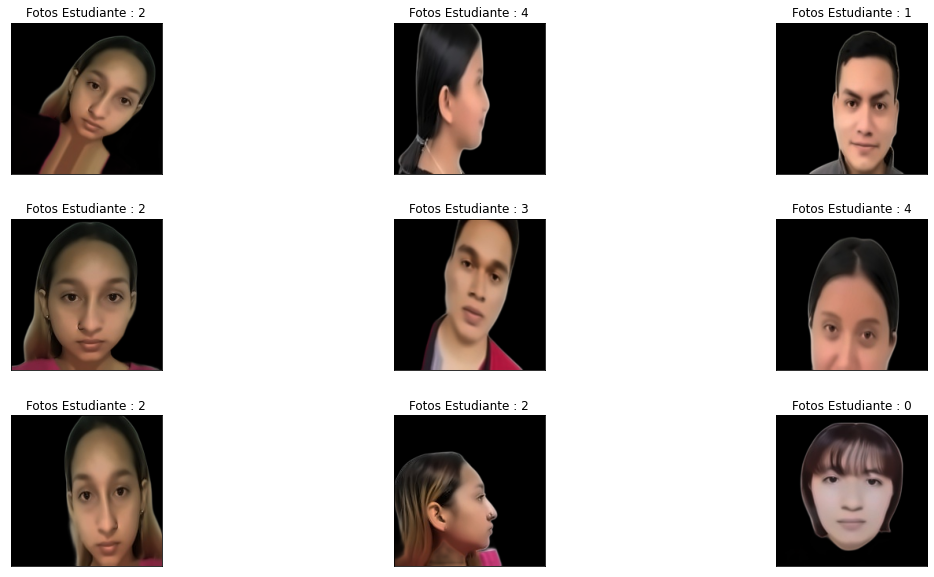

In [46]:
# muestra las imágenes aleatorias de cada categoría
display_rand_images(images, labels) 

In [47]:
# separa los datos de entrenamiento y prueba para el modelo
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed) 
# muestra las dimensiones de las imágenes de entrenamiento
print("train_ds shape = ",train_ds.shape) 
# muestra las dimensiones de las etiquetas de entrenamiento
print("train_labels shape = ",train_labels.shape) 
# muestra las dimensiones de las imágenes de prueba
print("\ntest_ds shape = ",test_ds.shape) 
# muestra las dimensiones de las etiquetas de prueba
print("test_labels shape = ",test_labels.shape) 

train_ds shape =  (120, 192, 192, 3)
train_labels shape =  (120,)

test_ds shape =  (30, 192, 192, 3)
test_labels shape =  (30,)


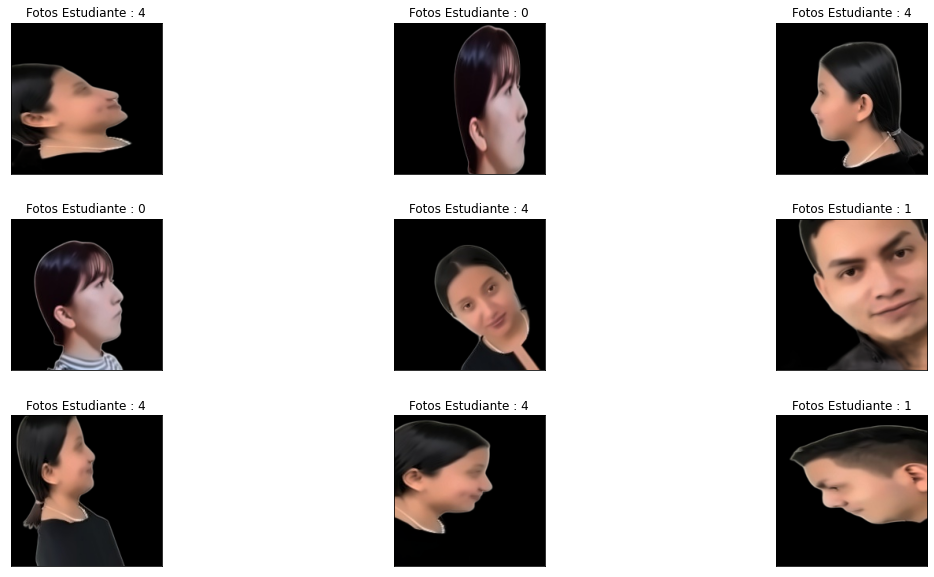

In [48]:
# muestra las imágenes aleatorias de entrenamiento
display_rand_images(train_ds, train_labels) 

In [49]:
# Redimensiona las imágenes de entrenamiento
train_ds = tf.image.resize(train_ds, (227, 227)) 
# Redimensiona las imágenes de prueba
test_ds = tf.image.resize(test_ds, (227, 227)) 

# Arquitectura AlexNet